In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

In [ ]:
# Load the dataset
airline_data = pd.read_csv(r"/content/Airline_customer_satisfaction.csv")

In [ ]:
# Explore the first 10 rows of the dataset
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
#Check for the number of rows as values and columns as variables in the dataset
airline_data.shape

(129880, 22)

This shows that there are 22 variables and 129880 values in the dataset and it is a large dataset.

In [ ]:
# Check for duplicates in the dataset
airline_data.duplicated().sum()

0

In [ ]:
# Check for the columns in the dataset
air_col_name = airline_data.columns
air_col_name

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
# Check for missing values in the dataset
air_null = airline_data.isnull().sum().sort_values(ascending=False)
air_null

,0
Arrival Delay in Minutes,393
Customer Type,0
Departure Delay in Minutes,0
Online boarding,0
Cleanliness,0
Checkin service,0
Baggage handling,0
Leg room service,0
On-board service,0
Ease of Online booking,0


From this we can see that Arrival Delay in Minutes column is the only one with missing values.

In [ ]:
# Show the overview of Statistical properties of the numerical variables.
round(airline_data.describe(),1) #set to a decimal point

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129487.0
mean,39.4,1981.4,2.8,3.0,2.9,3.0,3.2,3.4,3.5,3.5,3.5,3.5,3.7,3.3,3.7,3.4,14.7,15.1
std,15.1,1027.1,1.4,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.1,38.5
min,7.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,27.0,1359.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,40.0,1925.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0
75%,51.0,2544.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,12.0,13.0
max,85.0,6951.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


From this we can see that:
*The passengers ages range from 7 to 85 years, the average age is around 39/40 years and most of them are within 27 to 51 years which indicates that majority of the passengers are middle-aged. The airline company can make interesting marketing strategies that cater to middle-aged passengers.

* The Flight Distances vary from 50 to 6951 kilometres, has an average of 1981.4 with a standard deviation value of 1027.1 which shows that there us wide variation of flights like short-haul, medium-haul and long-haul flights with majority of them being medium-haul flights.

* The ratings for the several services like seat comfort, online support etc have average value ranging from 2.9 to 3.7 out of 5 which shows that most passengers gave moderate ratings. The company can work on making these services better to improve customer experience.

* The Arrival Delays and Departure Delays have average value of 15.1 and 14.7 minutes with standard deviation value of 38.5 and 38.1 respectively. They both have their median values as 0 which shows that most of their flights arrive and leave on time but there are still large values like 1584 and 1592 for Arrival and Departure delays respectively which indicate that there are some occassional delays. The company can do investigations as to why these delays occur and develop ways to deal with them.

In [ ]:

# Show the total number of values, the unique values, the most frequent value(top) and its frequency for all categorical features
airline_data.describe(include="object")


,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


From the above, it shows that:
* For Satisfaction, there are only 2 types of values with the most frequent being 'satisfied' with 71,087 out of 129880.

* For Customer Type, there are only 2 types of values with the most frequent being 'Loyal Customer' with 106,100 out of 129880.

* For Type of Travel, there are only 2 types of values with the most frequent being 'Business travel' with 89693 out of 129880.

* For Class, there are only 3 types of values with the most frequent being 'Business' with 62,160 out of 129880.

EDA VISUALIZATIONS

1. Making a heatmap for Numerical Columns in the Dataset

In [ ]:
# Create a dataframe to store the  numerical variables and their values
airline_num = airline_data.select_dtypes(include=["int64", "float64"])
airline_num.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


<Axes: >

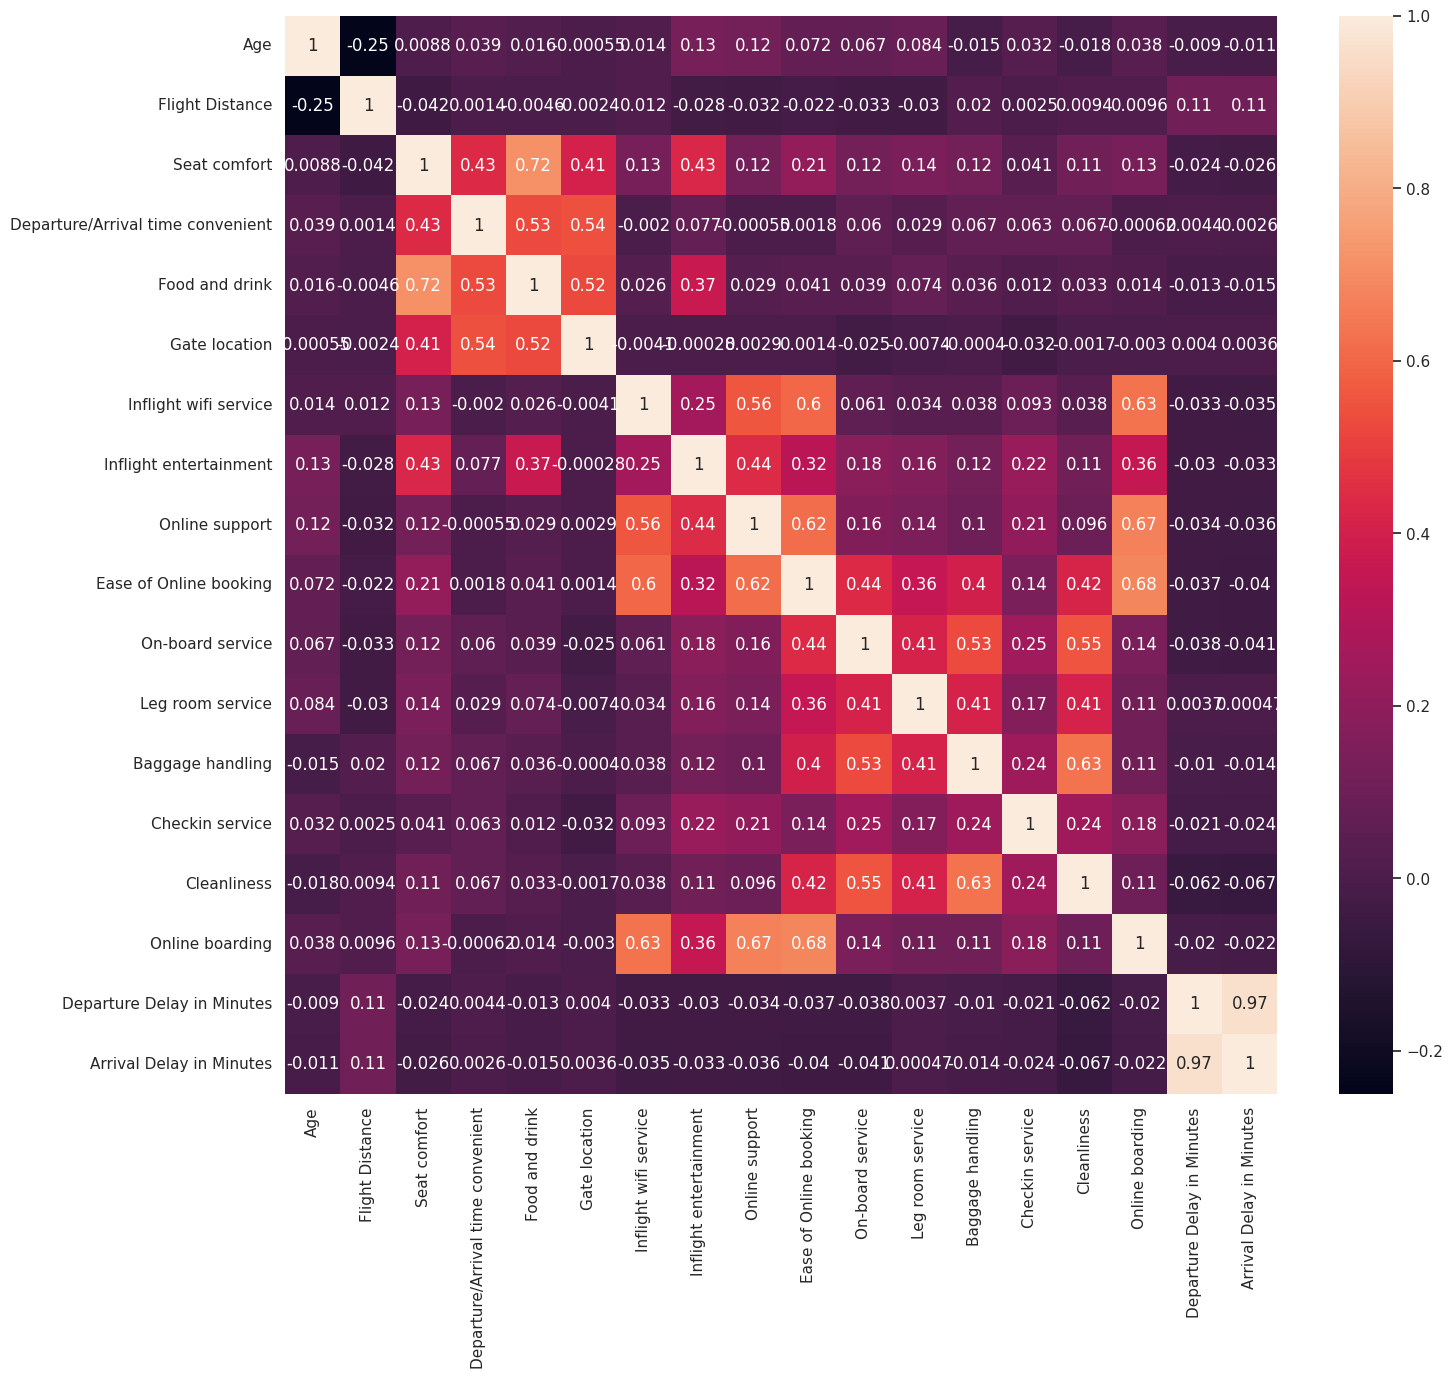

In [ ]:
###EDA VISUALIZATION
# Plot a heatmap for the numerical variables in the dataset to show correlation between numerical variables in the dataset

sns.set(rc={'figure.figsize':(16,14)})
sns.heatmap(airline_num.corr(), annot=True)

From this we can see that:
* There is a very high positive correlation(0.97) between Arrival and Departure Delays which shows that flights that arrive late happen due to them departing late. This gives a direct relationship and should be worked on.

* The strong correlations(0.6-0.68) between online services(boarding, booking, support and wifi) ratings show the importance of having seamless digital experience to satisfy customers.

* The strong correlations between in-flight services such as Foof & Drink and Seat Comfort(0.72) as well as baggage handling and Cleanliness(0.63) show how important it is to maintain high standards of flight experience to improve customer satisfaction.

2. Creating Histogram Plots for the Numerical Columns in the dataset

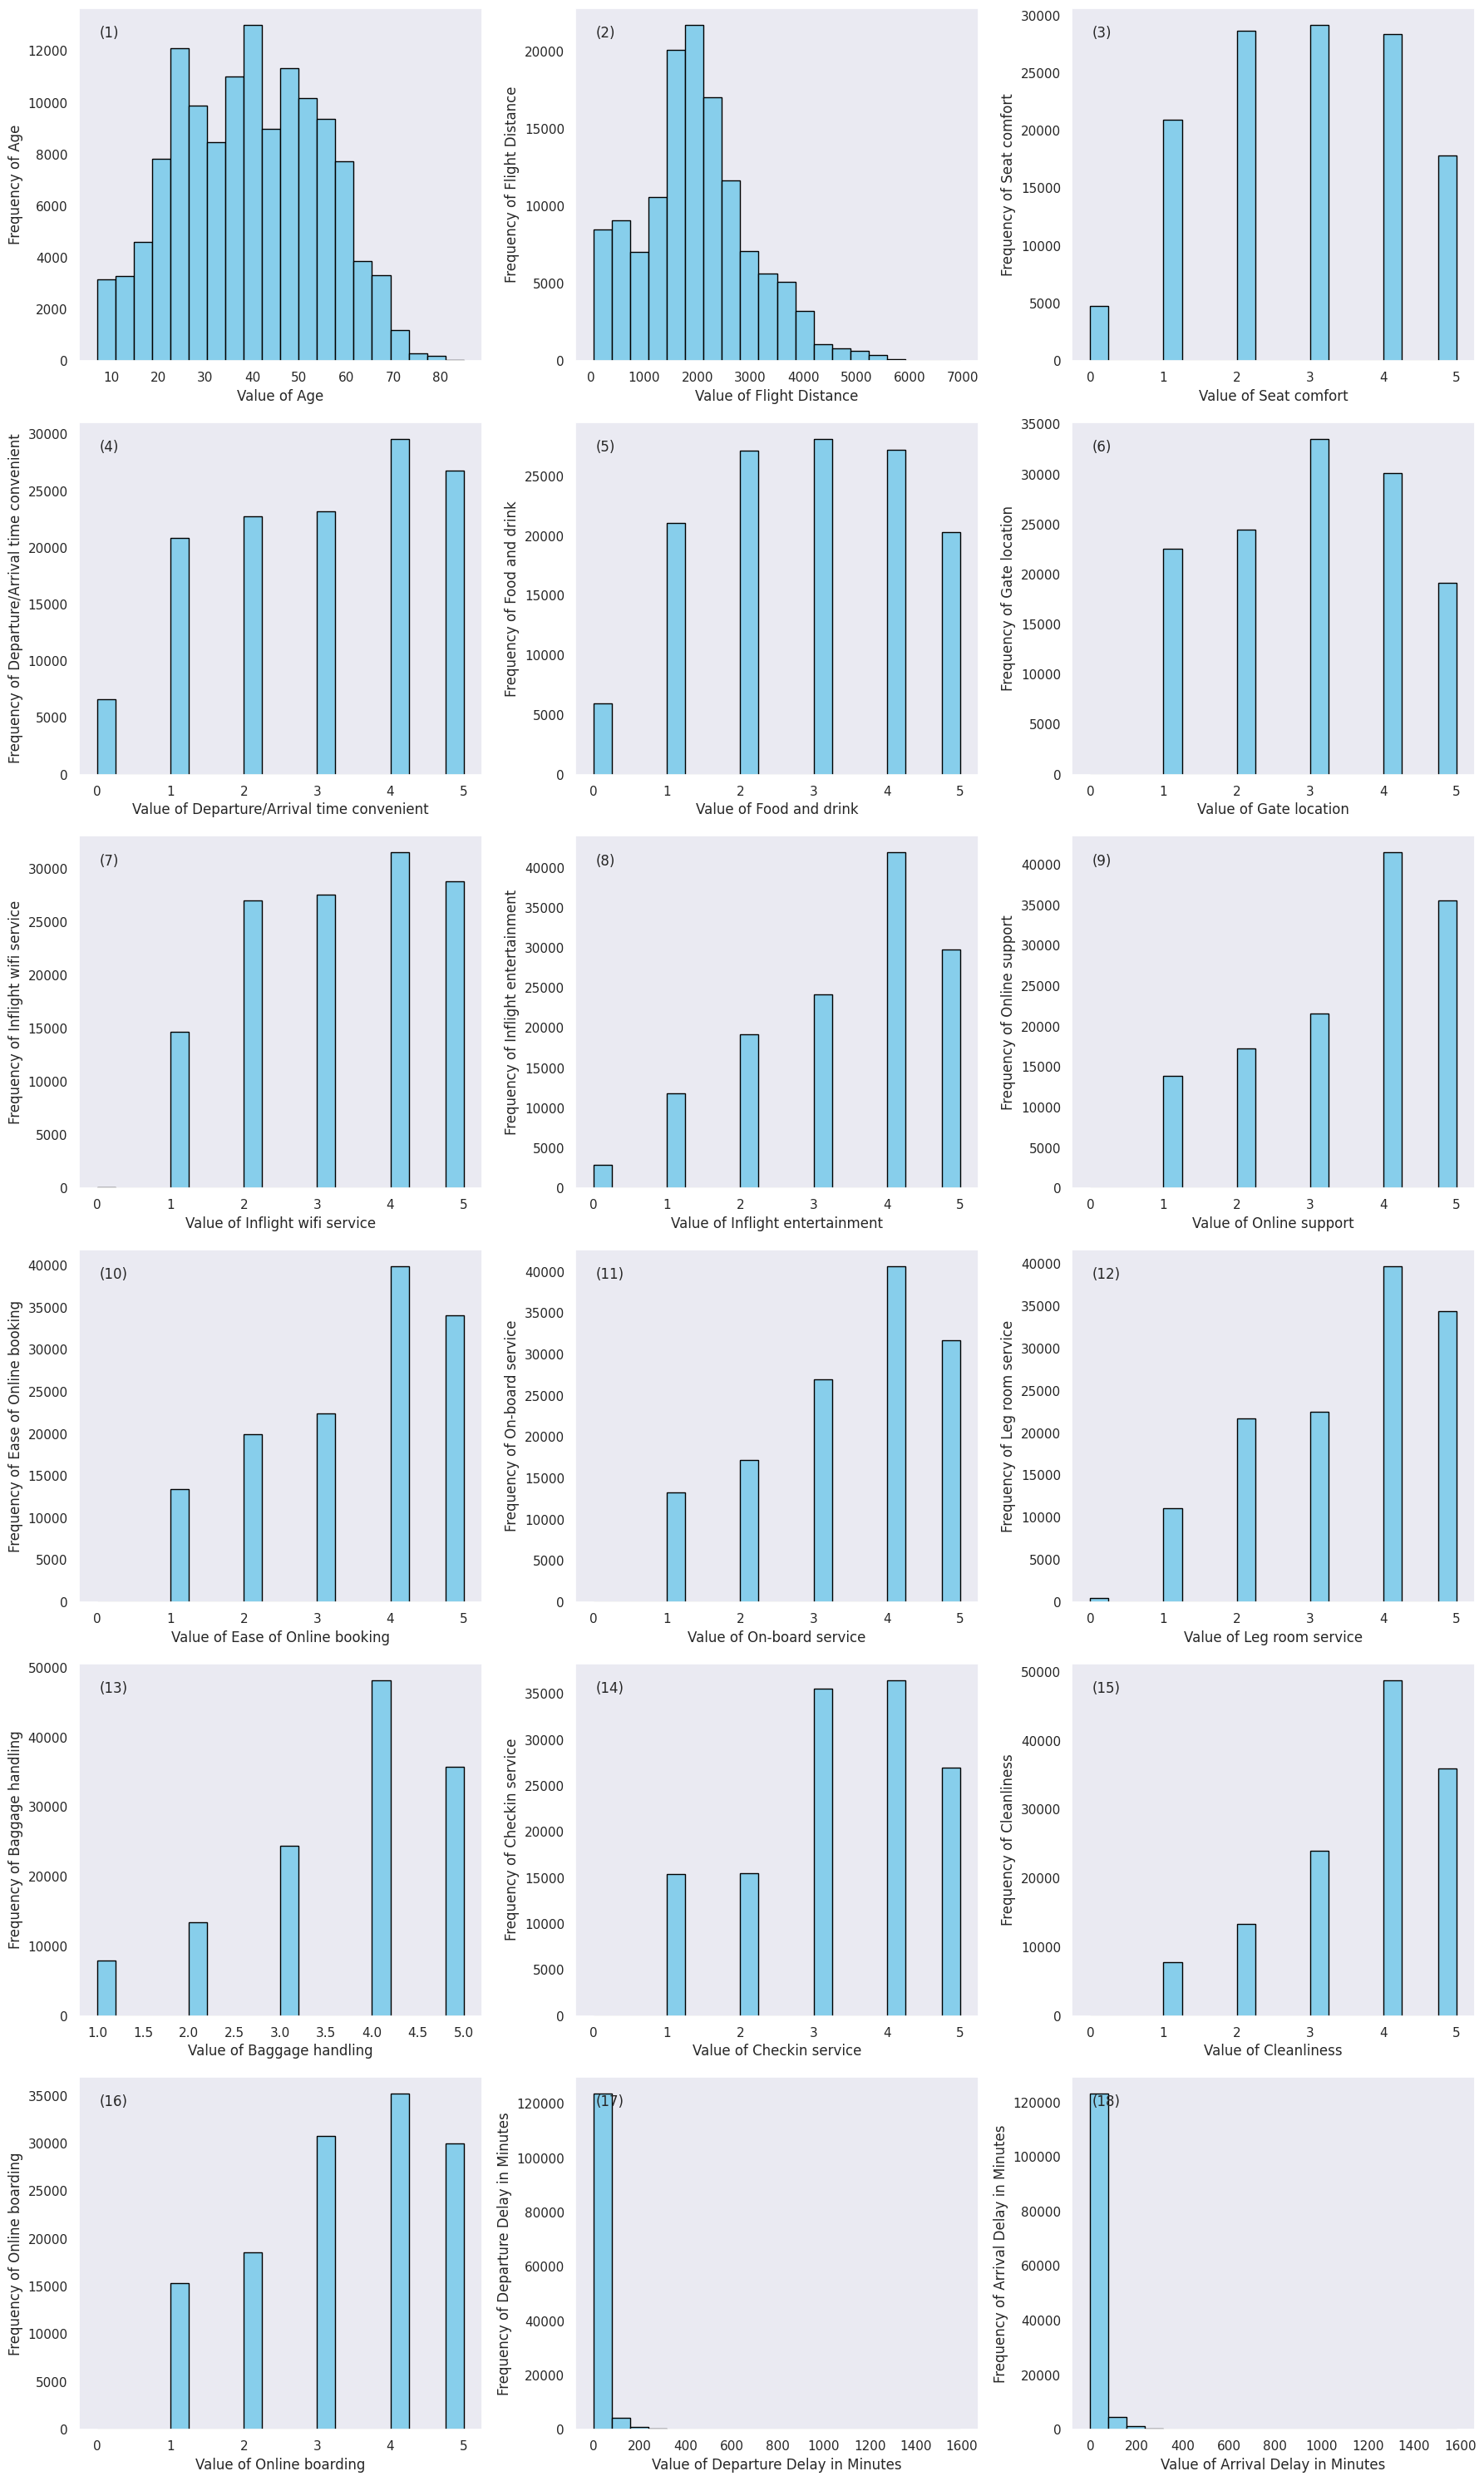

In [ ]:
### EDA VISUALIZATIONS
#put the list of numerical columns into the num_columns variable
num_columns = airline_num.columns

#calculate the number of rows needed for the subplot grid
num_row = len(num_columns) // 3 + (len(num_columns) % 3 > 0)

#Put the number of columns for the subplot grid to be shown
num_col = 3

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(18,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a histogram for each column
for a, column in enumerate(num_columns):
    ax = axes[a]    #get the current axis using index a

    #plot the histogram for the current column
    ax.hist(airline_num[column], bins=20, color='skyblue', edgecolor='black')

    #Label the x-axis as value of the column name
    ax.set_xlabel(f"Value of {column}")

    #Label the y-axis as Frequency of the column name
    ax.set_ylabel(f"Frequency of {column}")

    #add text annotation for subplot index
    ax.text(0.05,0.95, f"({a+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

    #Remove grid lines
    ax.grid(False)

#Remove any unused subplots to avoid showing empty plots
for i in range(len(num_columns), num_col * num_row):
    fig.delaxes(axes[i])

#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

From these plots we can see that:
* The Age plot(labelled as (1)) formed a bell-shaped plot which shows normal distribution of the values. Also most of the passengers are middle-aged.

* The Flight Distance plot(labelled as (2)) is skewed to the left which shows that the airline medium-haul travels.

* The plots of most of the ratings(labelled from (3) to (16)) are skewed to the right which shows good customer satisfaction.

* The plots for Arrival delay(labelled as (18)) and Departure delay(labelled as (17)) are really skewed to the left which shows that most flights are not delayed for up to 3-4 hours.

3. Creating Pie Charts for Categorical Columns in the Dataset

In [ ]:
# Create a dataframe to store the  categorical variables and their values
airline_cat = airline_data.select_dtypes(include=["object"])
airline_cat.head()

,satisfaction,Customer Type,Type of Travel,Class
0,satisfied,Loyal Customer,Personal Travel,Eco
1,satisfied,Loyal Customer,Personal Travel,Business
2,satisfied,Loyal Customer,Personal Travel,Eco
3,satisfied,Loyal Customer,Personal Travel,Eco
4,satisfied,Loyal Customer,Personal Travel,Eco


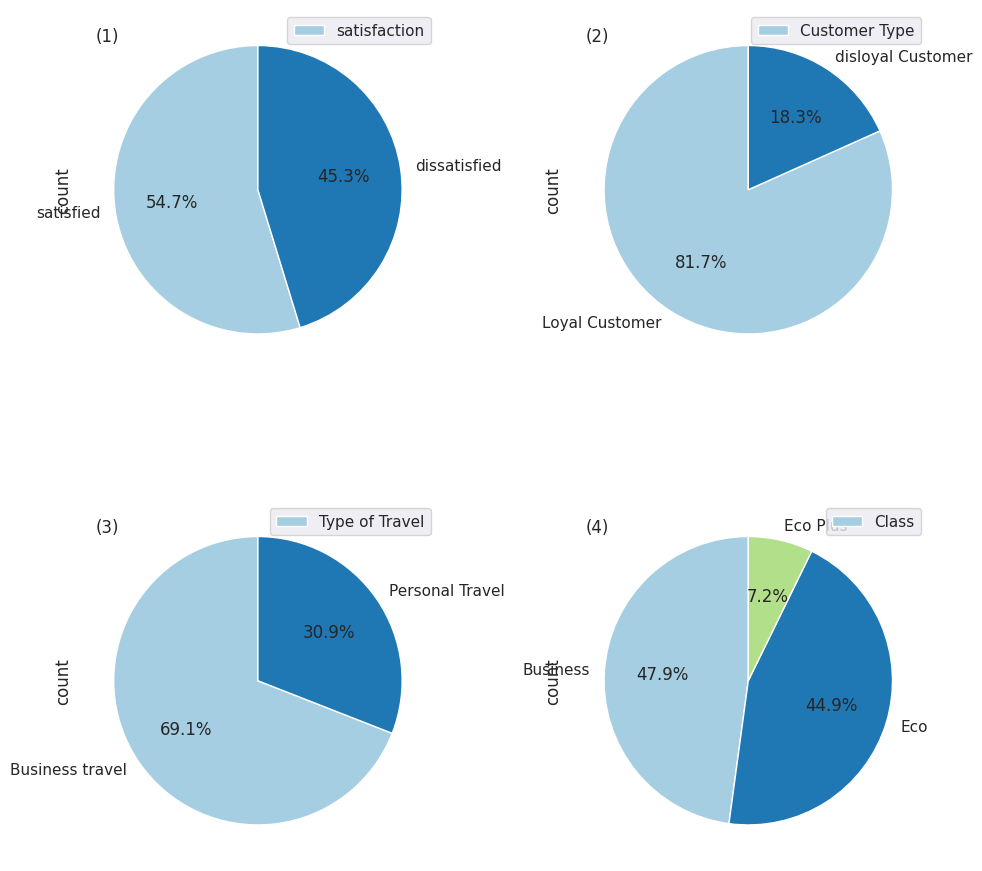

In [ ]:
### EDA VISUALIZATIONS
#put the list of categorical columns into the cat_columns variable
cat_columns = airline_cat.columns

#calculate the number of rows needed for the subplot grid
cat_row = len(cat_columns) // 2 + (len(cat_columns) % 2 > 0)

#Put the number of columns for the subplot grid to be shown
cat_col = 2

#Create a figure and axes of subplots
fig, axes = plt.subplots(cat_row, cat_col, figsize=(10,5*cat_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each categorical column and create a pie chart for each column
for b, column in enumerate(cat_columns):
    ax = axes[b]    #get the current axis using index b

    #calculate the count of values for the categorical column
    cat_value = airline_cat[column].value_counts()

    #plot the pie chart for the current column
    cat_value.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, labels=cat_value.index)

    #Add Legend to each column
    ax.legend([column], loc='upper right')

    #add text annotation for subplot index
    ax.text(0.05,0.95, f"({b+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

    #Remove grid lines
    ax.grid(False)


#Remove any unused subplots to avoid showing empty plots
for i in range(len(cat_columns), cat_col * cat_row):
    fig.delaxes(axes[i])

#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

From these pie charts, we can see that:

(1) 54.7% of the passengers were satisfied and 45.3% were dissatisfied which shows that majority of the customers were pleased. Also the column is balanced.

(2) 81.7% of the customers are loyal and 18.3% are disloyal which indicates that majority of their customers are Loyal.

(3) 69.1% of passengers go for business travel and 30.9% go for personal travels. This means that majority of their customers are corporate clientele who go for business trips.

(4) 47.9% of passengers fly Business class closely followed by 44.9% flying Economy class with the rest flying Economy Plus which shows that majority of their customers prefer premium and standard seating options when traveling.

4. Checking for Ouliers and Visualizing Using Box Plots

Before going ahead, we need to temporaily drop the missing values in Arrival Delay In Minutes column so that the boxplot can be plotted.

In [ ]:
#drop the missing values in the numerical column dataframe and save into a new variable.
cleaned_air_num = airline_num.dropna(subset=['Arrival Delay in Minutes'])
cleaned_air_num

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


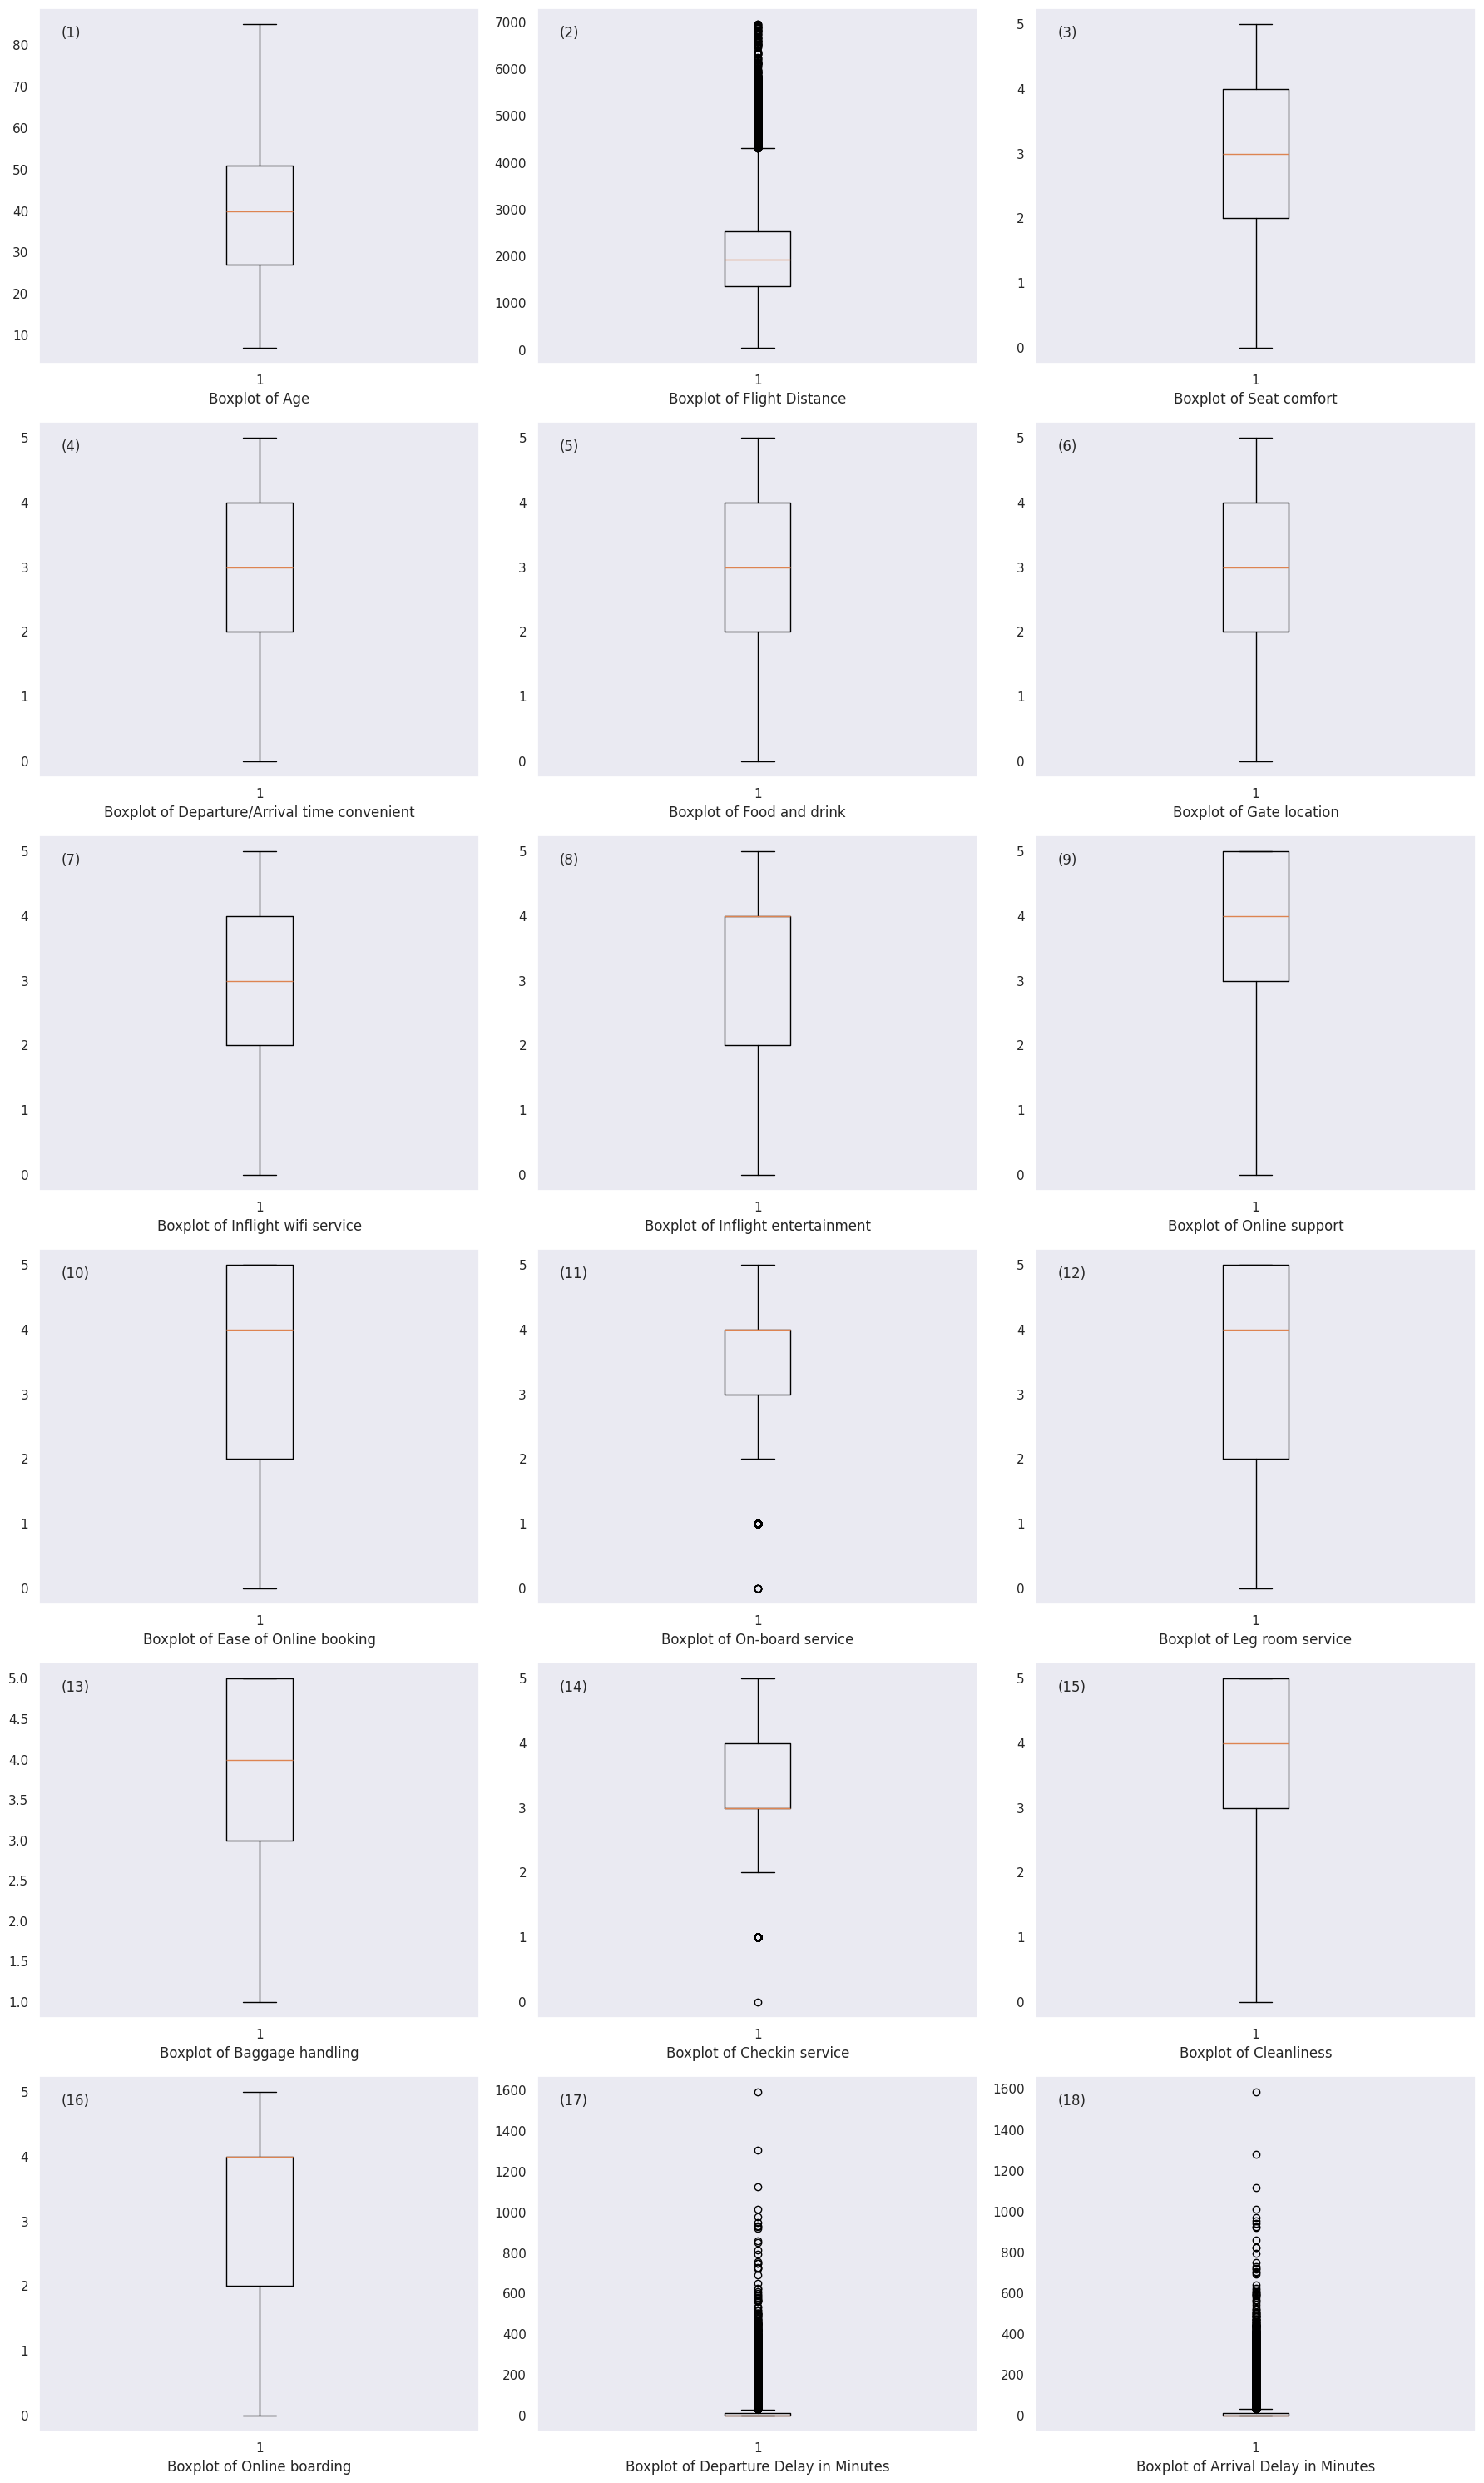

In [ ]:
# Create a dataframe to store the  numerical variables and their values
a = cleaned_air_num.select_dtypes(include=["int64", "float64"])

#put the columns in a list
q = a.columns

#Put the number of columns for the subplot grid to be shown
num_col = 3

#calculate the number of rows needed for the subplot grid
num_row = len(q) // 3 + (len(q) % 3 > 0)

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(18,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a boxplot for each column
for c, column in enumerate(q):
    ax = axes[c] if c < len(q) else None #get the current axis using index c

    if ax is not None:
        #plot the histogram for the current column
        ax.boxplot(a[column])

        #Label the x-axis as value of the column name
        ax.set_xlabel(f"Boxplot of {column}")

        #add text annotation for subplot index
        ax.text(0.05,0.95, f"({c+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

        #Remove grid lines
        ax.grid(False)


#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

From these plots we can see that:
* Flight Distance(2) has values outside the box plot above the Q3 indicating that there are outliers in this column.

* On-board service(11) and Checkin service(14) ratings both have just 2 values below the Q1 value(outsdie the box plot) which shows there are a few outliers in these columns.

* Departure Delay(17) and Arrival Delay(18) have a lot of values above Q3 which shows that there is a lot of outliers in these columns.

* All the ratings columns((3) to (16)) have 0,1,2,3,4,5 as values instead of 1,2,3,4,5.

5. Checking for normality using Q-Q Plots

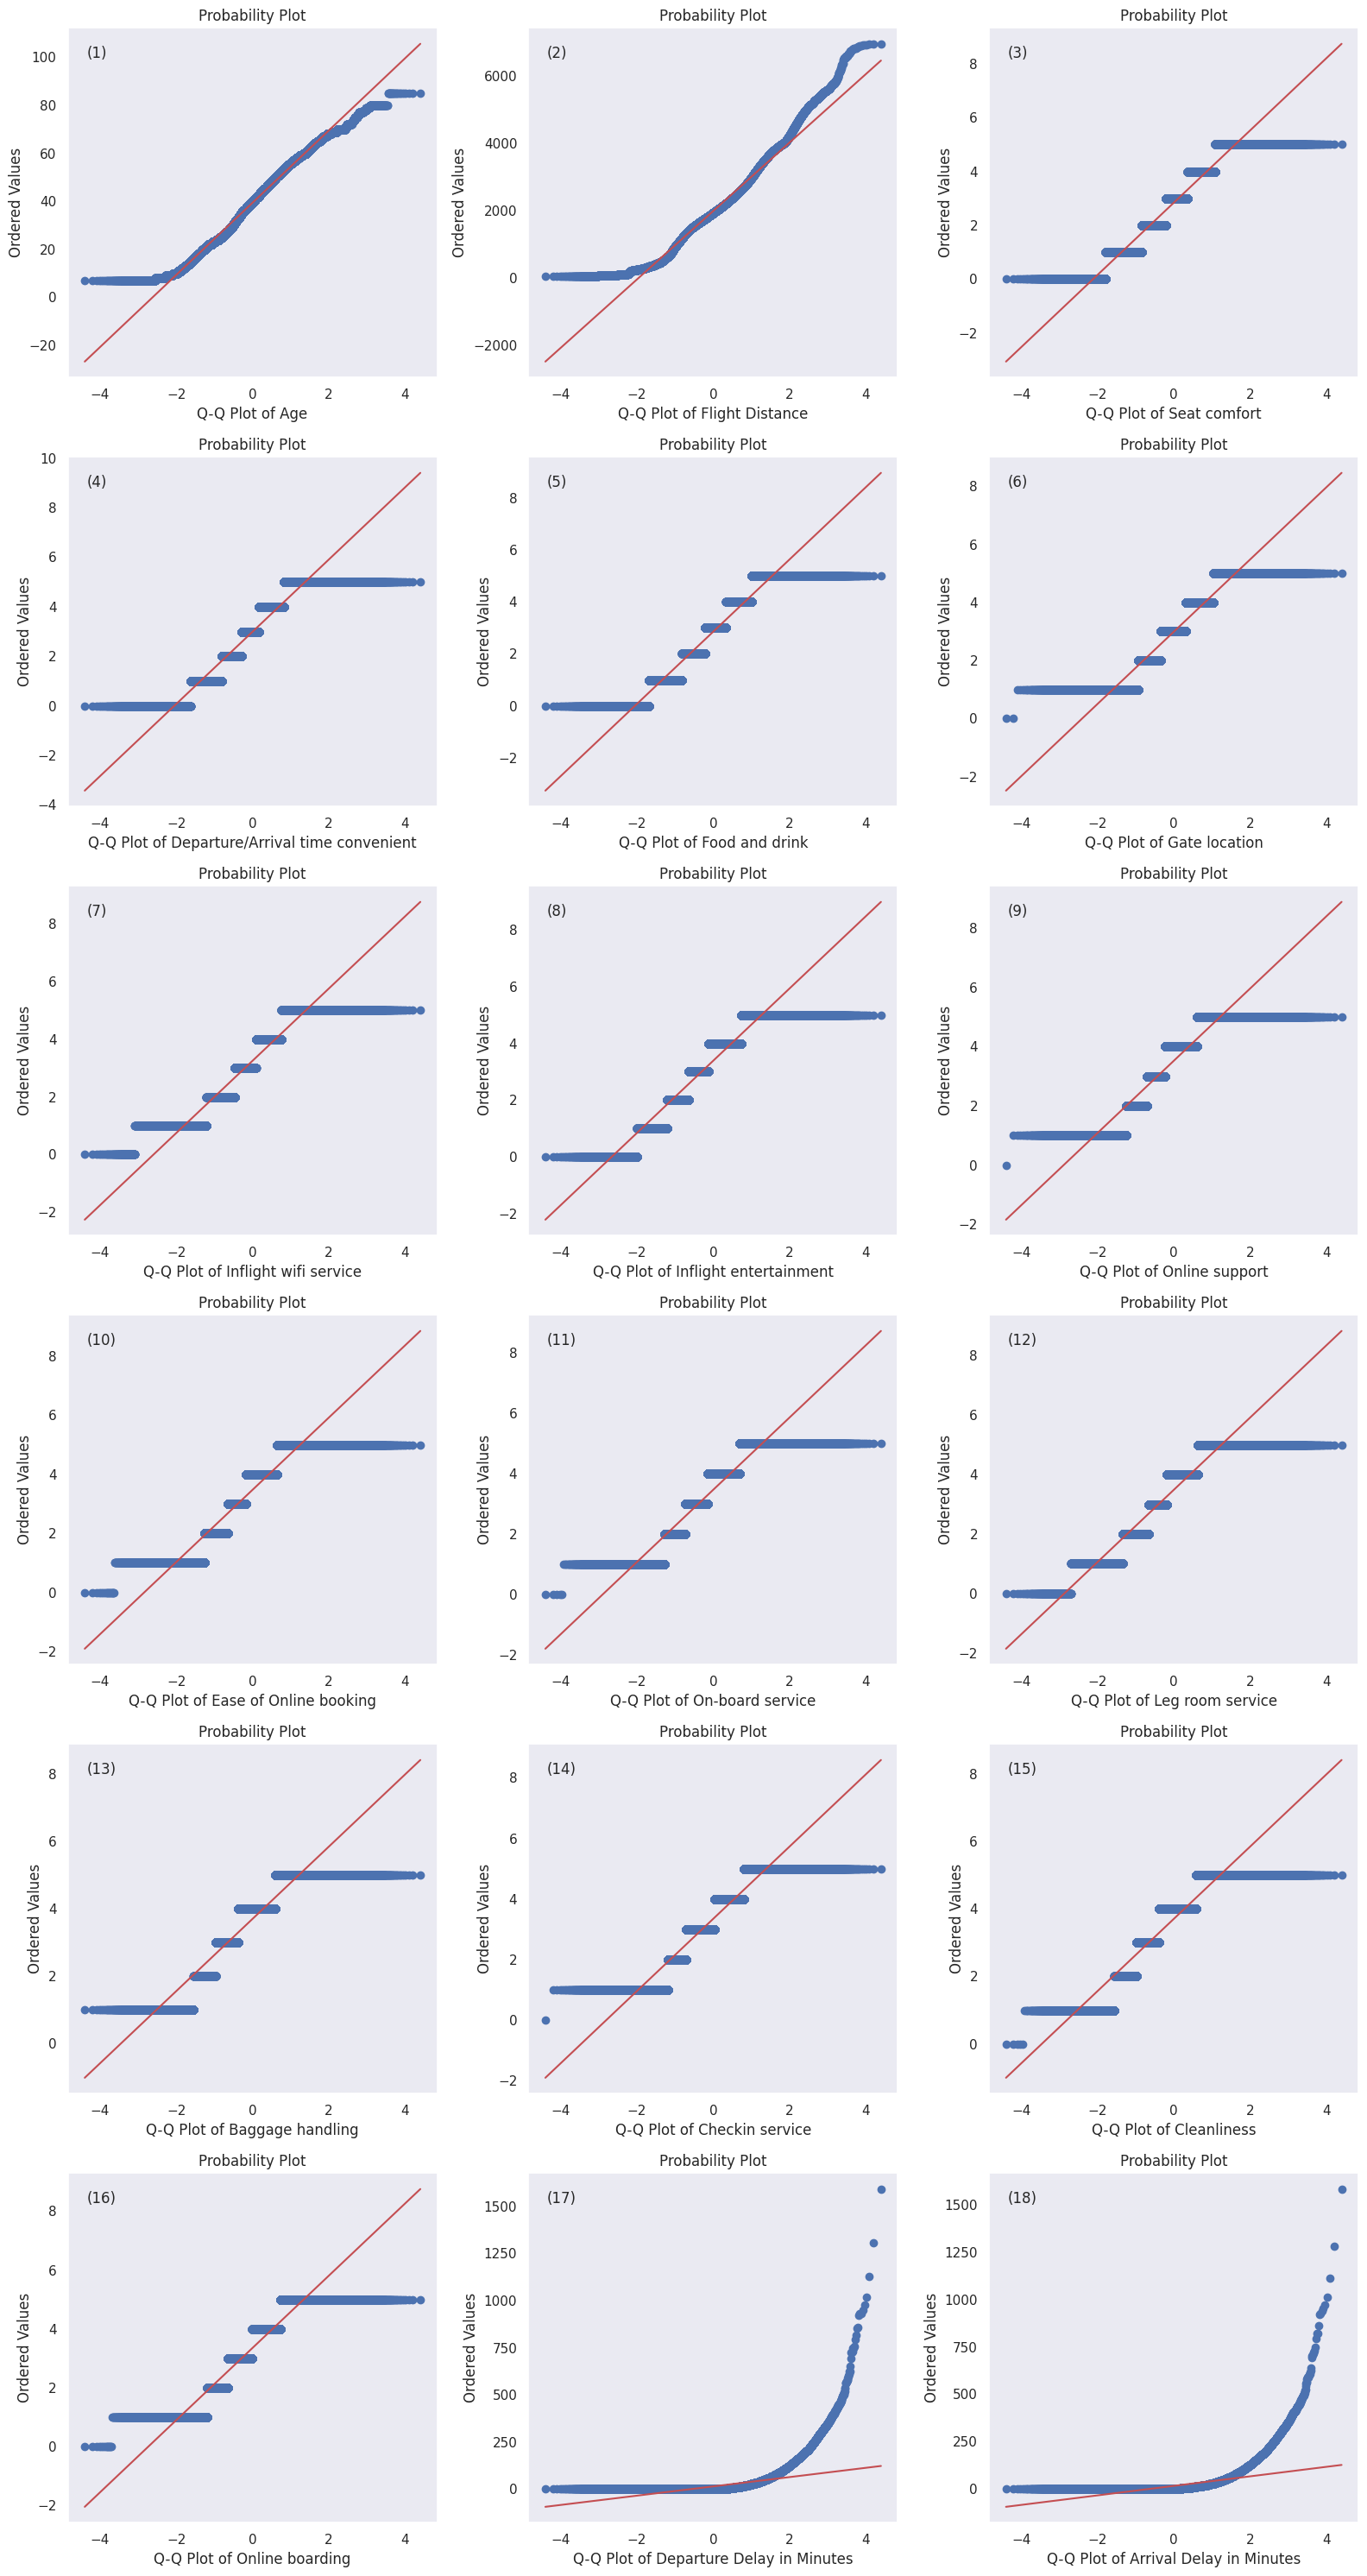

In [ ]:
### EDA VISUALIZATIONS
#put the columns in a list
q_q = cleaned_air_num.columns

#Put the number of columns for the subplot grid to be shown
num_col = 3

#calculate the number of rows needed for the subplot grid
num_row = len(q_q) // 3 + (len(q_q) % 3 > 0)

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(16,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a histogram for each column
for c, column in enumerate(q_q):
    ax = axes[c] if c < len(q_q) else None #get the current axis using index c

    if ax is not None:
        #Generate a Q-Q Plot
        stats.probplot(cleaned_air_num[column], dist='norm', plot=ax)

        #Label the x-axis as value of the column name
        ax.set_xlabel(f"Q-Q Plot of {column}")

        #add text annotation for subplot index
        ax.text(0.05,0.95, f"({c+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

        #Remove grid lines
        ax.grid(False)


#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

The Q-Q Plots are done to comapre the quantiles of the values in the numerical columns to those of normal distribution.

From the charts above, we can see that the values(blue) are not on the y=x line(red) for all the columns. This indicates that the values are not regularly distributed.

6. Checking for Normality Using Shapiro-Wilk Test

In [ ]:
#Create a For Loop to iterate through each numerical column
for col in cleaned_air_num:
    #perform shapiro test on each column
    stat, p_value= shapiro(cleaned_air_num[col])

    #Intepret the result
    if p_value > 0.05:
        interpretation = 'The Data is normally distributed (fail to reject H0)'
    else:
        interpretation = 'The Data is  not normally distributed (reject H0)'

    #print the results for all numerical columns
    print(f"Column: {col}")
    print(f"Shapiro-Wilk Statistic: {stat}")
    print(f"p-value: {p_value}")
    print(f"Interpretation: {interpretation}\n")

Column: Age
Shapiro-Wilk Statistic: 0.9884807064303859
p-value: 6.162078364470629e-65
Interpretation: The Data is  not normally distributed (reject H0)

Column: Flight Distance
Shapiro-Wilk Statistic: 0.9787167982246506
p-value: 2.3842621245142056e-78
Interpretation: The Data is  not normally distributed (reject H0)

Column: Seat comfort
Shapiro-Wilk Statistic: 0.9284487086299849
p-value: 1.2488640825797507e-108
Interpretation: The Data is  not normally distributed (reject H0)

Column: Departure/Arrival time convenient
Shapiro-Wilk Statistic: 0.9096388301447543
p-value: 4.894623369957208e-115
Interpretation: The Data is  not normally distributed (reject H0)

Column: Food and drink
Shapiro-Wilk Statistic: 0.9259797990918922
p-value: 1.5028333823933007e-109
Interpretation: The Data is  not normally distributed (reject H0)

Column: Gate location
Shapiro-Wilk Statistic: 0.9055844866010141
p-value: 2.9112463263410745e-116
Interpretation: The Data is  not normally distributed (reject H0)

Co

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129487.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk Test evaluates the null hypothesis(H0) that the data came from a normal distribution by using the p-value(>0.05) to check.

From the results above, the p-values for all the numerical colums are less than 0.05 which means that the values are not normally distributed.